In [1]:
import pandas as pd

treasury_rates = pd.read_csv("12MonthTreasuryBillRate.csv")

treasury_rates.head()


,Date,Time,Tenor,Rate(%)
0,30-Sep-24,5:30:00 PM,12 Months,6.55
1,27-Sep-24,5:30:00 PM,12 Months,6.56
2,26-Sep-24,5:30:00 PM,12 Months,6.55
3,25-Sep-24,5:30:00 PM,12 Months,6.54
4,24-Sep-24,5:30:00 PM,12 Months,6.55


In [ ]:
symbols = ['IPCALAB', 'JIOFIN', 'RBLBANK', 'KALYANKJIL', 'LATENTVIEW', 'MSUMI', 'POWERINDIA', 'REDINGTON']
amount = 1000000
weight = [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]

# for symbol in symbols:
#     data_1 = pd.read_csv(f"30-06-2022-TO-29-06-2023-{symbol}-ALL-N.csv")
#     data_2 = pd.read_csv(f"30-06-2023-TO-30-06-2024-{symbol}-ALL-N.csv")
#     frames = [data_1, data_2]
#     merged_data = pd.concat(frames)
#     merged_data.to_csv(f"{symbol}_data.csv")

In [ ]:
file_path = "merged_data.csv"

# Load data
data = pd.read_csv(file_path, parse_dates=['Date  '], dayfirst=True)

data.columns = data.columns.str.strip()  # Removes any leading/trailing whitespace

# Set 'Date' as the index for time series operations
data.set_index('Date', inplace=True)

# Ensure the data is sorted by date
data.sort_index(inplace=True)

# Calculate Daily Returns
data['Daily_Return'] = ((data['Close Price'] - data['Close Price'].shift(1)) / data['Close Price'].shift(1)) * 100

# Calculate Weekly Returns
weekly_data = data['Close Price'].resample('W').last()  # Last price of each week
weekly_returns = ((weekly_data - weekly_data.shift(1)) / weekly_data.shift(1)) * 100

# Calculate Monthly Returns
monthly_data = data['Close Price'].resample('M').last()  # Last price of each month
monthly_returns = ((monthly_data - monthly_data.shift(1)) / monthly_data.shift(1)) * 100

# Combine all returns into a single DataFrame
# Reindex weekly and monthly returns to align with the daily index for easy comparison
returns = pd.DataFrame({
    'Daily_Return': data['Daily_Return'],
    'Weekly_Return': weekly_returns.reindex(data.index, method='ffill'),
    'Monthly_Return': monthly_returns.reindex(data.index, method='ffill')
})

# Drop rows with NaN values due to shift() operations
returns.dropna(inplace=True)

# Display the first few rows of the returns data
print(returns.head(30))

            Daily_Return  Weekly_Return  Monthly_Return
Date                                                   
2022-08-01      0.845503       0.308404        8.597663
2022-08-02      0.533537       0.308404        8.597663
2022-08-03      0.833965       0.308404        8.597663
2022-08-04      5.714286       0.308404        8.597663
2022-08-05      1.280228       0.308404        8.597663
2022-08-08      0.280899       9.454266        8.597663
2022-08-10     -3.011204       9.454266        8.597663
2022-08-11      1.155235       9.454266        8.597663
2022-08-12     -0.142755       9.454266        8.597663
2022-08-16      0.428878      -1.755618        8.597663
2022-08-17      0.355872      -1.755618        8.597663
2022-08-18      0.425532      -1.755618        8.597663
2022-08-19     -1.129944      -1.755618        8.597663
2022-08-22      0.357143       0.071480        8.597663
2022-08-23     10.106762       0.071480        8.597663
2022-08-24      3.490627       0.071480        8

In [55]:
print(data.columns)



Index(['Unnamed: 0', 'Symbol', 'Series', 'Prev Close', 'Open Price',
       'High Price', 'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover ₹', 'No. of Trades',
       'Deliverable Qty', '% Dly Qt to Traded Qty', 'Daily_Return'],
      dtype='object')


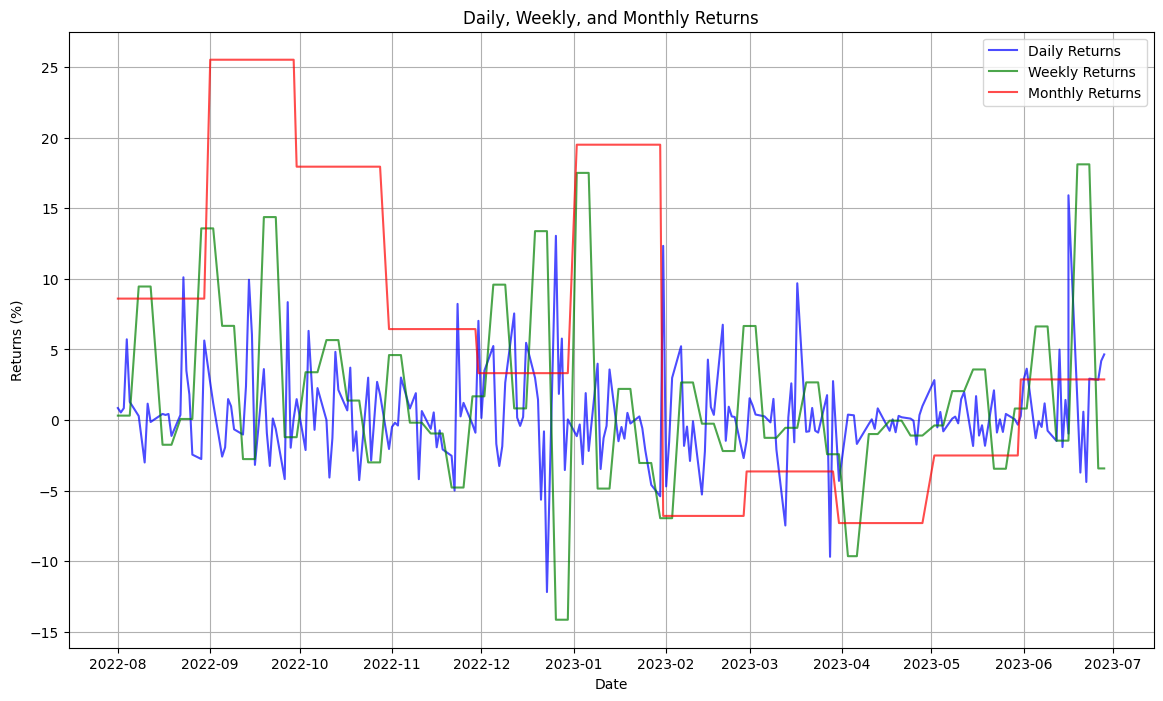

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

plt.plot(returns.index, returns['Daily_Return'], label='Daily Returns', color='blue', alpha=0.7)
plt.plot(returns.index, returns['Weekly_Return'], label='Weekly Returns', color='green', alpha=0.7)
plt.plot(returns.index, returns['Monthly_Return'], label='Monthly Returns', color='red', alpha=0.7)

plt.title('Daily, Weekly, and Monthly Returns')
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.legend()

plt.grid(True)
plt.show()